Activity 2: K-nn classification with credit data

Referred from Chapter 3 of Doing Data Science text book.

In [37]:
install.packages("class")
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [14]:
library("class")
library("ggplot2")

In [2]:
#Reading data from german_credit_data1.csv
data = read.csv("german_credit_data1.csv")
head(data)
dim(data)

X.,Age,Sex,Job,Housing,Saving.accounts,Checking.account,Credit.amount,Duration,Purpose,Credit.Risks
0,67,male,2,own,NA,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,NA,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2
5,35,male,1,free,NA,NA,9055,36,education,1


[1] 1000   11

In [3]:
#Selecting only those rows with complete data in columns 2,6,7
data1 = data[complete.cases(data[,c(2,6,7)]),] 
dim(data1)

[1] 522  11

In [4]:
head(data1)

,X.,Age,Sex,Job,Housing,Saving.accounts,Checking.account,Credit.amount,Duration,Purpose,Credit.Risks
2,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
4,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
5,4,53,male,2,free,little,little,4870,24,car,2
8,7,35,male,3,rent,little,moderate,6948,36,car,1
10,9,28,male,3,own,little,moderate,5234,30,car,2
11,10,25,female,2,rent,little,moderate,1295,12,car,2


In [5]:
#Finding the unique values of Saving.accounts and Checking.account
unique(data1$Saving.accounts)
unique(data1$Checking.account)

[1] little     moderate   quite rich rich      
Levels: little moderate quite rich rich

[1] moderate little   rich    
Levels: little moderate rich

Modifying the columns as follows:

little:1 moderate:2 quite rich:3 rich:4

In [6]:
#Modifying the values of the columns Saving.accounts and Checking.account 
size = nrow(data1)
for(i in (1:size))
    {
    saving = data1$Saving.accounts[i]
    checking = data1$Checking.account[i]
    
    if(saving == "little")
    {
        s = 1
    }
    else if(saving == "moderate")
    {
        s=2
    }
    else if(saving == "quite rich")
    {
        s=3
    }
    else if (saving == "rich")
    {
        s=4
    }
    else
    {
        s=0
    }
        
    if(checking == "little")
    {
        c = 1
    }
    else if(checking == "moderate")
    {
        c=2
    }
    else if (checking == "rich")
    {
        c=4
    }
    else
    {
        c=0
    }
        
        data1$account[i] = s+c
}

In [7]:
head(data1)

,X.,Age,Sex,Job,Housing,Saving.accounts,Checking.account,Credit.amount,Duration,Purpose,Credit.Risks,account
2,1,22,female,2,own,little,moderate,5951,48,radio/TV,2,3
4,3,45,male,2,free,little,little,7882,42,furniture/equipment,1,2
5,4,53,male,2,free,little,little,4870,24,car,2,2
8,7,35,male,3,rent,little,moderate,6948,36,car,1,3
10,9,28,male,3,own,little,moderate,5234,30,car,2,3
11,10,25,female,2,rent,little,moderate,1295,12,car,2,3


In [8]:
min_age = min(data1[,2])
max_age = max(data1[,2])
min_account = min(data1[,12])
max_account = max(data1[,12])

In [11]:
#Normalizing the columns Age and account
for( i in (1:nrow(data1)))
    {
    x = data1$Age[i]
    y = data1$account[i]
    
    n_age = (x - min_age)/(max_age - min_age)
    n_account = (y - min_account)/(max_account - min_account)
    
    data1$norm_age[i] = n_age
    data1$norm_account[i] = n_account
}

In [12]:
head(data1)

,X.,Age,Sex,Job,Housing,Saving.accounts,Checking.account,Credit.amount,Duration,Purpose,Credit.Risks,account,norm_age,norm_account
2,1,22,female,2,own,little,moderate,5951,48,radio/TV,2,3,0.05357143,0.1666667
4,3,45,male,2,free,little,little,7882,42,furniture/equipment,1,2,0.46428571,0.0000000
5,4,53,male,2,free,little,little,4870,24,car,2,2,0.60714286,0.0000000
8,7,35,male,3,rent,little,moderate,6948,36,car,1,3,0.28571429,0.1666667
10,9,28,male,3,own,little,moderate,5234,30,car,2,3,0.16071429,0.1666667
11,10,25,female,2,rent,little,moderate,1295,12,car,2,3,0.10714286,0.1666667


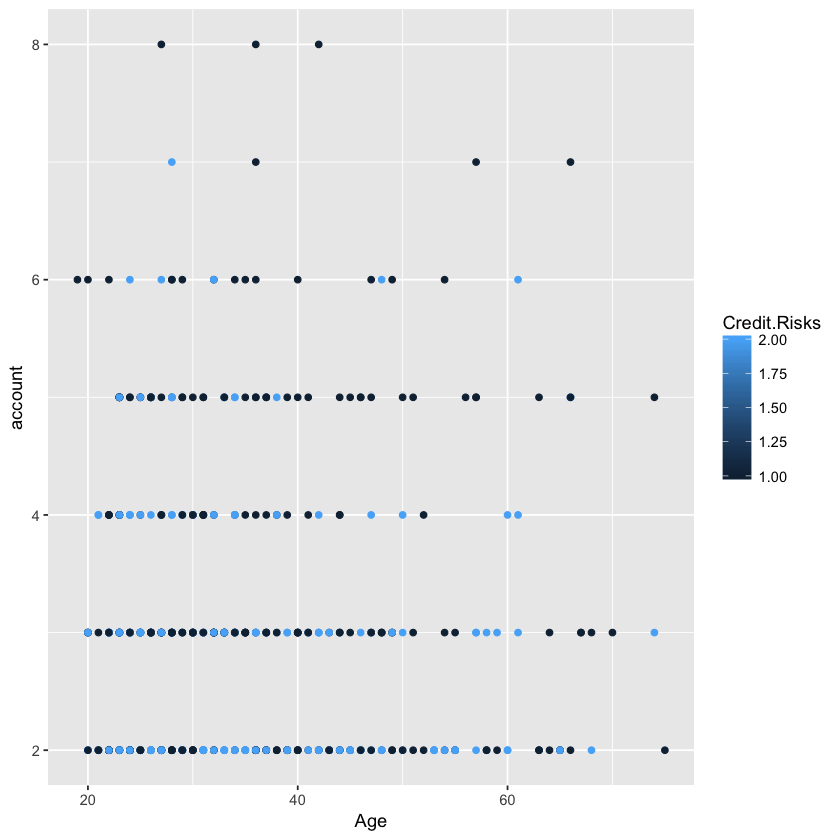

In [26]:
#Plotting the data according to Credit.Risks
p1 = ggplot(data1, aes(x = Age, y = account)) 
p1 + geom_point(aes(color = Credit.Risks))

In [42]:
result = data.frame(matrix(ncol = 5, nrow = 20))
dim(result)
colnames(result) = c("K-value","sixty","seventy","eighty","ninety")
colnames(result)

[1] 20  5

[1] "K-value" "sixty"   "seventy" "eighty"  "ninety"

In [37]:
set.seed(123)
n1 = nrow(data1) 

sampling_rate = 0.8
n2 =  n1 * (1 - sampling_rate)

training = sample(1:n1, sampling_rate*n1, replace=FALSE)
train = subset(data1[training,], select=c(norm_age,norm_account))

testing = setdiff(1:n1,training)
test = subset(data1[testing,], select=c(norm_age,norm_account))

cl =  data1$Credit.Risks[training]
true_labels = data1$Credit.Risks[testing]

#Computing misclassification rate
for(k in 1:20)
    {
    predicted_labels = knn(train,test,cl,k)
    incorrect = sum(predicted_labels !=true_labels)
    misclassification_rate = incorrect/n2
    result$K[k] = k
    result$eighty[k] = misclassification_rate
}

In [40]:
#For sampling_rate = 0.6
sampling_rate = 0.6
n2 =  n1 * (1 - sampling_rate)

training = sample(1:n1, sampling_rate*n1, replace=FALSE)
train = subset(data1[training,], select=c(norm_age,norm_account))

testing = setdiff(1:n1,training)
test = subset(data1[testing,], select=c(norm_age,norm_account))

cl =  data1$Credit.Risks[training]
true_labels = data1$Credit.Risks[testing]

#Computing misclassification rate
for(k in 1:20)
    {
    predicted_labels = knn(train,test,cl,k)
    incorrect = sum(predicted_labels !=true_labels)
    misclassification_rate = incorrect/n2
    result$sixty[k] = misclassification_rate
}

#For sampling_rate = 0.7
sampling_rate = 0.7
n2 =  n1 * (1 - sampling_rate)

training = sample(1:n1, sampling_rate*n1, replace=FALSE)
train = subset(data1[training,], select=c(norm_age,norm_account))

testing = setdiff(1:n1,training)
test = subset(data1[testing,], select=c(norm_age,norm_account))

cl =  data1$Credit.Risks[training]
true_labels = data1$Credit.Risks[testing]

#Computing misclassification rate
for(k in 1:20)
    {
    predicted_labels = knn(train,test,cl,k)
    incorrect = sum(predicted_labels !=true_labels)
    misclassification_rate = incorrect/n2
    result$seventy[k] = misclassification_rate
}

#For sampling_rate = 0.9
sampling_rate = 0.9
n2 =  n1 * (1 - sampling_rate)

training = sample(1:n1, sampling_rate*n1, replace=FALSE)
train = subset(data1[training,], select=c(norm_age,norm_account))

testing = setdiff(1:n1,training)
test = subset(data1[testing,], select=c(norm_age,norm_account))

cl =  data1$Credit.Risks[training]
true_labels = data1$Credit.Risks[testing]

#Computing misclassification rate
for(k in 1:20)
    {
    predicted_labels = knn(train,test,cl,k)
    incorrect = sum(predicted_labels !=true_labels)
    misclassification_rate = incorrect/n2
    result$ninety[k] = misclassification_rate
}

In [41]:
result

K-value,sixty,seventy,eighty,ninety,K
NA,0.4358238,0.5044700,0.4789272,0.3639847,1
NA,0.4501916,0.5172414,0.4885057,0.3639847,2
NA,0.4454023,0.4789272,0.5076628,0.3256705,3
NA,0.4501916,0.4725415,0.4597701,0.3256705,4
NA,0.4454023,0.4597701,0.4501916,0.2873563,5
NA,0.4885057,0.4150702,0.4885057,0.2873563,6
NA,0.4549808,0.4342273,0.4789272,0.2873563,7
NA,0.4549808,0.4342273,0.4980843,0.3448276,8
NA,0.4501916,0.4342273,0.4501916,0.3448276,9
NA,0.4645594,0.4597701,0.5076628,0.3448276,10


In [33]:
#Rounding the values upto 3 decimals.
res = round(result,3)
res

K,sixty,seventy,eighty,ninety
1,0.522,0.466,0.479,0.441
2,0.450,0.447,0.489,0.460
3,0.445,0.447,0.508,0.498
4,0.455,0.466,0.460,0.517
5,0.465,0.447,0.450,0.517
6,0.455,0.485,0.489,0.460
7,0.450,0.473,0.479,0.460
8,0.465,0.466,0.498,0.517
9,0.441,0.434,0.450,0.536
10,0.455,0.441,0.508,0.536
